# 作业二：分类任务

1.	数据集：使用鸢尾花数据集(Iris Dataset)。该数据集包含三种不同鸢尾花的特征，适合用于分类任务。

2.	数据集划分：选择留出法、交叉验证法、自助法其中之一来创建训练集和测试集。

3.	实现要求：

* Logistic回归：
	* 手动实现，不要直接调用库。
	* 选择合适的参数，并比较不同参数对模型性能的影响。
	* 使用准确率、查准率、查全率、F1值分析模型性能。
	* 可视化分类结果。
* 贝叶斯分类器：
	* 手动实现，不要直接调用库。
	* 选择合适的参数，并比较不同参数对模型性能的影响。
	* 使用准确率、查准率、查全率、F1值分析模型性能。
	* 可视化分类结果。
* Softmax回归（选做）
	* 手动实现，不要直接调用库。
	* 选择合适的参数，并比较不同参数对模型性能的影响。
	* 使用准确率、查准率、查全率、F1值分析模型性能。
	* 可视化分类结果。
* 结果分析
	* 比较模型效果（ROC曲线，AUC曲线等）。

### 1. 数据集选择

使用鸢尾花数据集 (Iris Dataset)，该数据集包含三种鸢尾花（Setosa, Versicolor, Virginica）的特征：萼片长度、萼片宽度、花瓣长度、花瓣宽度。目标是将花种类作为分类目标。

### 2. 数据集划分

划分方式：

+ 选择留出法：将数据集分成训练集和测试集，通常是 70% 训练集和 30% 测试集。
+ 交叉验证法：将数据集分成K个部分，每次选择一个部分作为验证集，其余部分作为训练集，重复K次。
+ 自助法：通过随机抽样有放回的方式从数据集中生成多个样本集进行训练和测试。

然后我先使用 **选择留出法**，因为比较简单且有效。

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 选择留出法：划分数据集（70%训练集，30%测试集）
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### 3. 实现分类器

#### 3.1 Logistic回归（Logistic Regression）

手动实现Logistic回归。其模型公式如下：

$$y = \frac{1}{1 + e^{-z}}, \quad z = X\theta$$

其中，X是输入特征矩阵，θ是权重向量，y 是预测概率。

**步骤**：

- 初始化权重向量θ
- 通过梯度下降更新权重
- 计算交叉熵损失函数
- 训练并评估模型
- 使用准确率、查准率、查全率、F1值分析模型性能

In [8]:
class LogisticRegression:
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        
        # 进行梯度下降
        for _ in range(self.epochs):
            z = np.dot(X, self.weights)
            predictions = self.sigmoid(z)
            gradient = np.dot(X.T, (predictions - y)) / m
            self.weights -= self.learning_rate * gradient
    
    def predict(self, X):
        z = np.dot(X, self.weights)
        return np.round(self.sigmoid(z))
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        accuracy = accuracy_score(y, predictions)
        precision = precision_score(y, predictions, average='weighted')
        recall = recall_score(y, predictions, average='weighted')
        f1 = f1_score(y, predictions, average='weighted')
        return accuracy, precision, recall, f1

# 二分类需要将目标值转化为0和1（针对二分类时）
y_train_bin = (y_train == 0).astype(int)  # 选择一种类别
y_test_bin = (y_test == 0).astype(int)

# 训练模型
model = LogisticRegression(learning_rate=0.1, epochs=1000)
model.fit(X_train, y_train_bin)

# 评估
accuracy, precision, recall, f1 = model.evaluate(X_test, y_test_bin)
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")


Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0


#### 3.2 贝叶斯分类器（Naive Bayes Classifier）

贝叶斯分类器根据贝叶斯定理计算每个类的条件概率：

$$P(C_k | X) = \frac{P(X | C_k) P(C_k)}{P(X)}$$

假设特征条件独立，简化为：

$$P(X | C_k) = \prod_{i=1}^{d} P(x_i | C_k)$$

将计算每个类别的概率并进行分类。

In [9]:
class NaiveBayes:
    def __init__(self):
        self.class_probs = {}
        self.feature_probs = {}
    
    def fit(self, X, y):
        self.class_probs = {class_label: np.mean(y == class_label) for class_label in np.unique(y)}
        self.feature_probs = {}
        for class_label in np.unique(y):
            class_data = X[y == class_label]
            feature_probs = {}
            for feature_idx in range(X.shape[1]):
                feature_probs[feature_idx] = {
                    'mean': np.mean(class_data[:, feature_idx]),
                    'std': np.std(class_data[:, feature_idx])
                }
            self.feature_probs[class_label] = feature_probs
    
    def predict(self, X):
        predictions = []
        for x in X:
            class_probs = {}
            for class_label, class_prob in self.class_probs.items():
                prob = np.log(class_prob)
                for feature_idx, value in enumerate(x):
                    mean = self.feature_probs[class_label][feature_idx]['mean']
                    std = self.feature_probs[class_label][feature_idx]['std']
                    prob += -0.5 * np.log(2 * np.pi * std ** 2) - (value - mean) ** 2 / (2 * std ** 2)
                class_probs[class_label] = prob
            predictions.append(max(class_probs, key=class_probs.get))
        return np.array(predictions)

# 训练贝叶斯分类器
nb_model = NaiveBayes()
nb_model.fit(X_train, y_train)

# 评估
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Naive Bayes - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")


Naive Bayes - Accuracy: 0.9777777777777777, Precision: 0.9793650793650793, Recall: 0.9777777777777777, F1: 0.9777448559670783


### 解释

- **准确率** (Accuracy)：所有预测正确的比例
- **查准率** (Precision)：正确预测为正的样本占所有预测为正样本的比例
- **查全率** (Recall)：正确预测为正的样本占所有真实为正的样本的比例
- **F1值** (F1-score)：查准率和查全率的调和平均数

## 4. 可视化

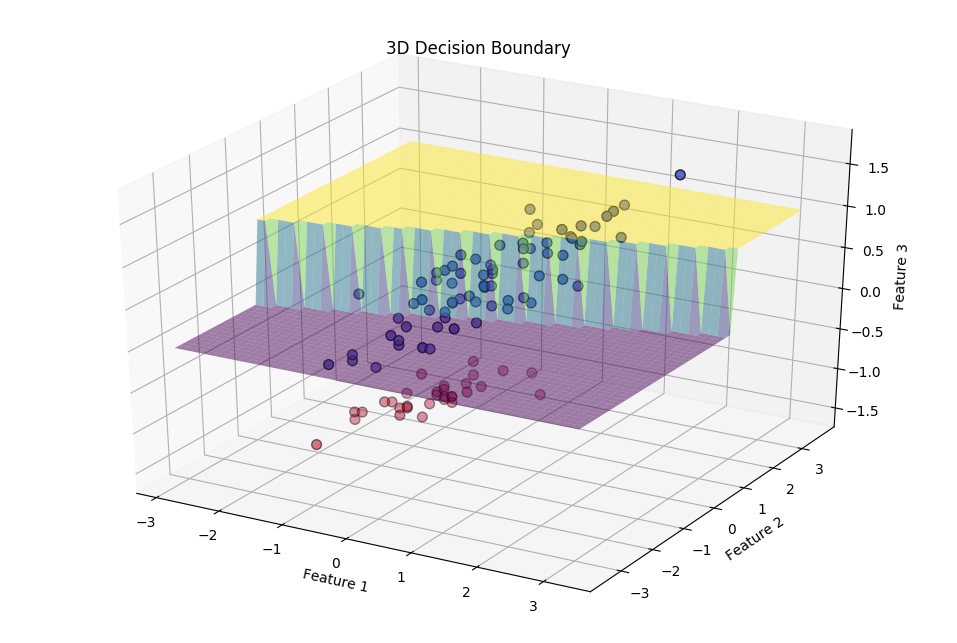

In [11]:
from mpl_toolkits.mplot3d import Axes3D

# 仅选择前三个特征
X_train_3d, X_test_3d = X_train[:, :3], X_test[:, :3]

# 训练Logistic回归模型（以二分类为例）
model = LogisticRegression(learning_rate=0.1, epochs=1000)
model.fit(X_train_3d, y_train_bin)

# 定义三维决策边界可视化函数
def plot_decision_boundary_3d(X, y, model):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # 设置特征范围
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    
    # 生成网格点
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 50),
        np.linspace(y_min, y_max, 50)
    )
    
    # 将网格点拼接为三维坐标
    grid = np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, X[:, 2].mean())]  # 固定Z轴为平均值
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    
    # 绘制三维决策边界
    ax.plot_surface(xx, yy, Z, alpha=0.5, cmap='viridis')
    
    # 绘制样本点
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='coolwarm', edgecolor='k', s=50)
    
    # 设置轴标签
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title("3D Decision Boundary")
    plt.show()

# 调用三维绘图函数
plot_decision_boundary_3d(X_train_3d, y_train_bin, model)


## 4.1 统计每个品种的样本数

In [17]:
import pandas as pd
from sklearn.datasets import load_iris

# 加载鸢尾花数据集
iris_data = load_iris()
iris = pd.DataFrame(
    data=iris_data.data,
    columns=iris_data.feature_names
)
iris["Species"] = [iris_data.target_names[target] for target in iris_data.target]

# 统计每个品种样本数
species_count = iris["Species"].value_counts()
print(species_count)

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64


## 4.2 花萼和花瓣的分布

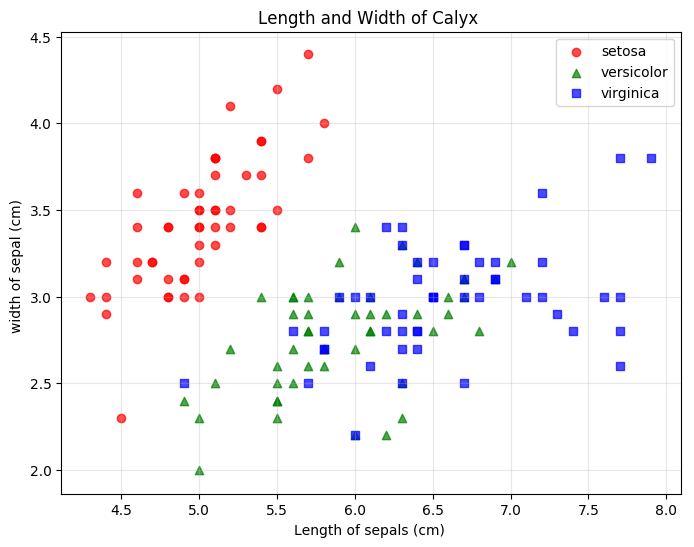

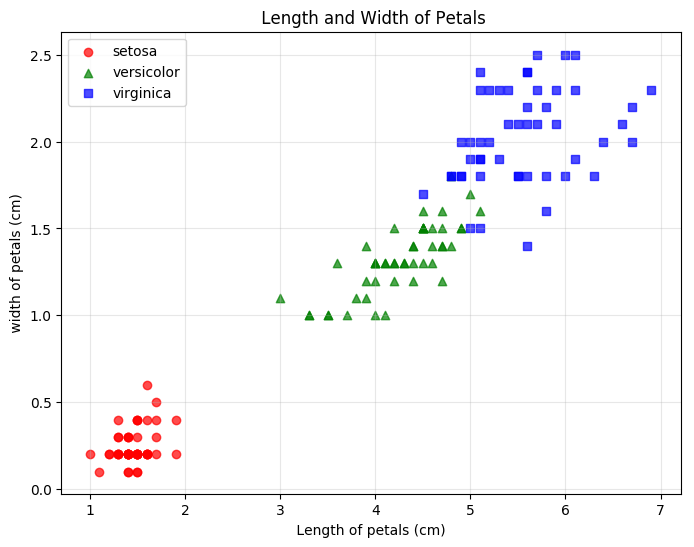

In [18]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# 准备数据
cc = defaultdict(list)
for i, row in iris.iterrows():
    cc[row["Species"]].append(row.values[:-1])  # 忽略Species列

# 设置样式
style_list = ['o', '^', 's']
colors = ['r', 'g', 'b']
titles=['Length and Width of Calyx ',' Length and Width of Petals']
x_labels=['Length of sepals (cm) ',' Length of petals (cm) ']
y_labels=['width of sepal (cm) ',' width of petals (cm) ']

# 绘图
for idx, feature_indices in enumerate([[0, 1], [2, 3]]):  # 分别绘制(0,1)和(2,3)的特征
    plt.figure(figsize=(8, 6))
    for i, (label, samples) in enumerate(cc.items()):
        samples = np.array(samples)
        plt.scatter(
            samples[:, feature_indices[0]],
            samples[:, feature_indices[1]],
            label=label,
            marker=style_list[i],
            color=colors[i],
            alpha=0.7
        )
    plt.title(titles[idx])
    plt.xlabel(x_labels[idx])
    plt.ylabel(y_labels[idx])
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


In [ ]:
# 设置样式
style_list = ['o', '^', 's']
colors = ['r', 'g', 'b']
titles=['Length and Width of Calyx ',' Length and Width of Petals']
x_labels=['Length of sepals (cm) ',' Length of petals (cm) ']
y_labels=['width of sepal (cm) ',' width of petals (cm) ']

# 绘图
for idx, feature_indices in enumerate([[0, 1], [2, 3]]):  # 分别绘制(0,1)和(2,3)的特征
    plt.figure(figsize=(8, 6))
    for i, (label, samples) in enumerate(cc.items()):
        samples = np.array(samples)
        plt.scatter(
            samples[:, feature_indices[0]],
            samples[:, feature_indices[1]],
            label=label,
            marker=style_list[i],
            color=colors[i],
            alpha=0.7
        )
    plt.title(titles[idx])
    plt.xlabel(x_labels[idx])
    plt.ylabel(y_labels[idx])
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


NameError: name 'cc' is not defined

<Figure size 800x600 with 0 Axes>

## 4.3 花瓣长度的分布

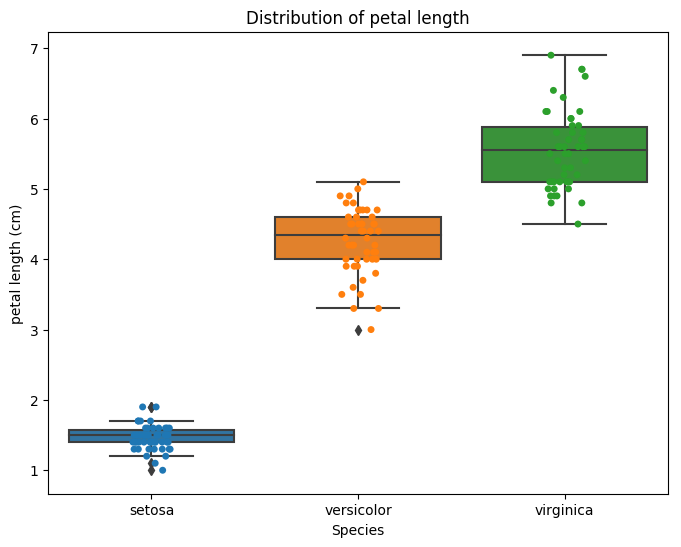

In [ ]:
# 绘制箱线图与点图
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x="Species", y="petal length (cm)", data=iris)
ax = sns.stripplot(x="Species", y="petal length (cm)", data=iris, jitter=True, edgecolor="gray")
plt.title ("Distribution of petal length")
plt.show()

## 4.4 Seaborn 的 stripplot 和 boxplot花瓣长度的分布

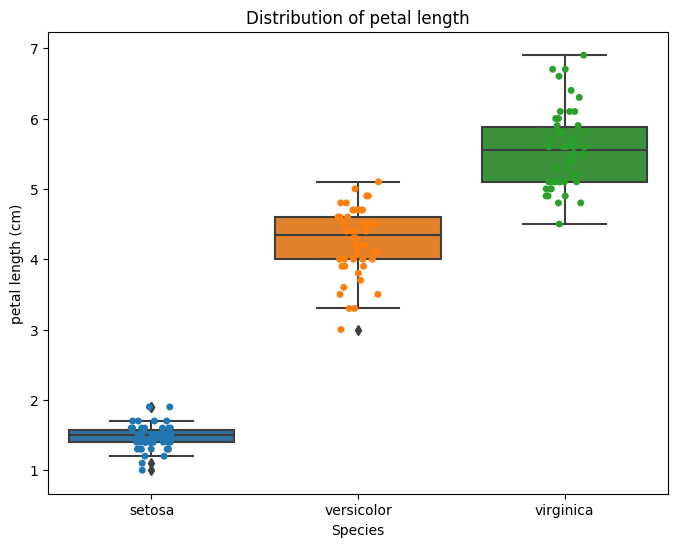

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制箱线图与点图
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x="Species", y="petal length (cm)", data=iris)
ax = sns.stripplot(x="Species", y="petal length (cm)", data=iris, jitter=True, edgecolor="gray")
plt.title("Distribution of petal length")
plt.show()

## 4.5 Seaborn 的 pairplot鸢尾花特征的成对关系

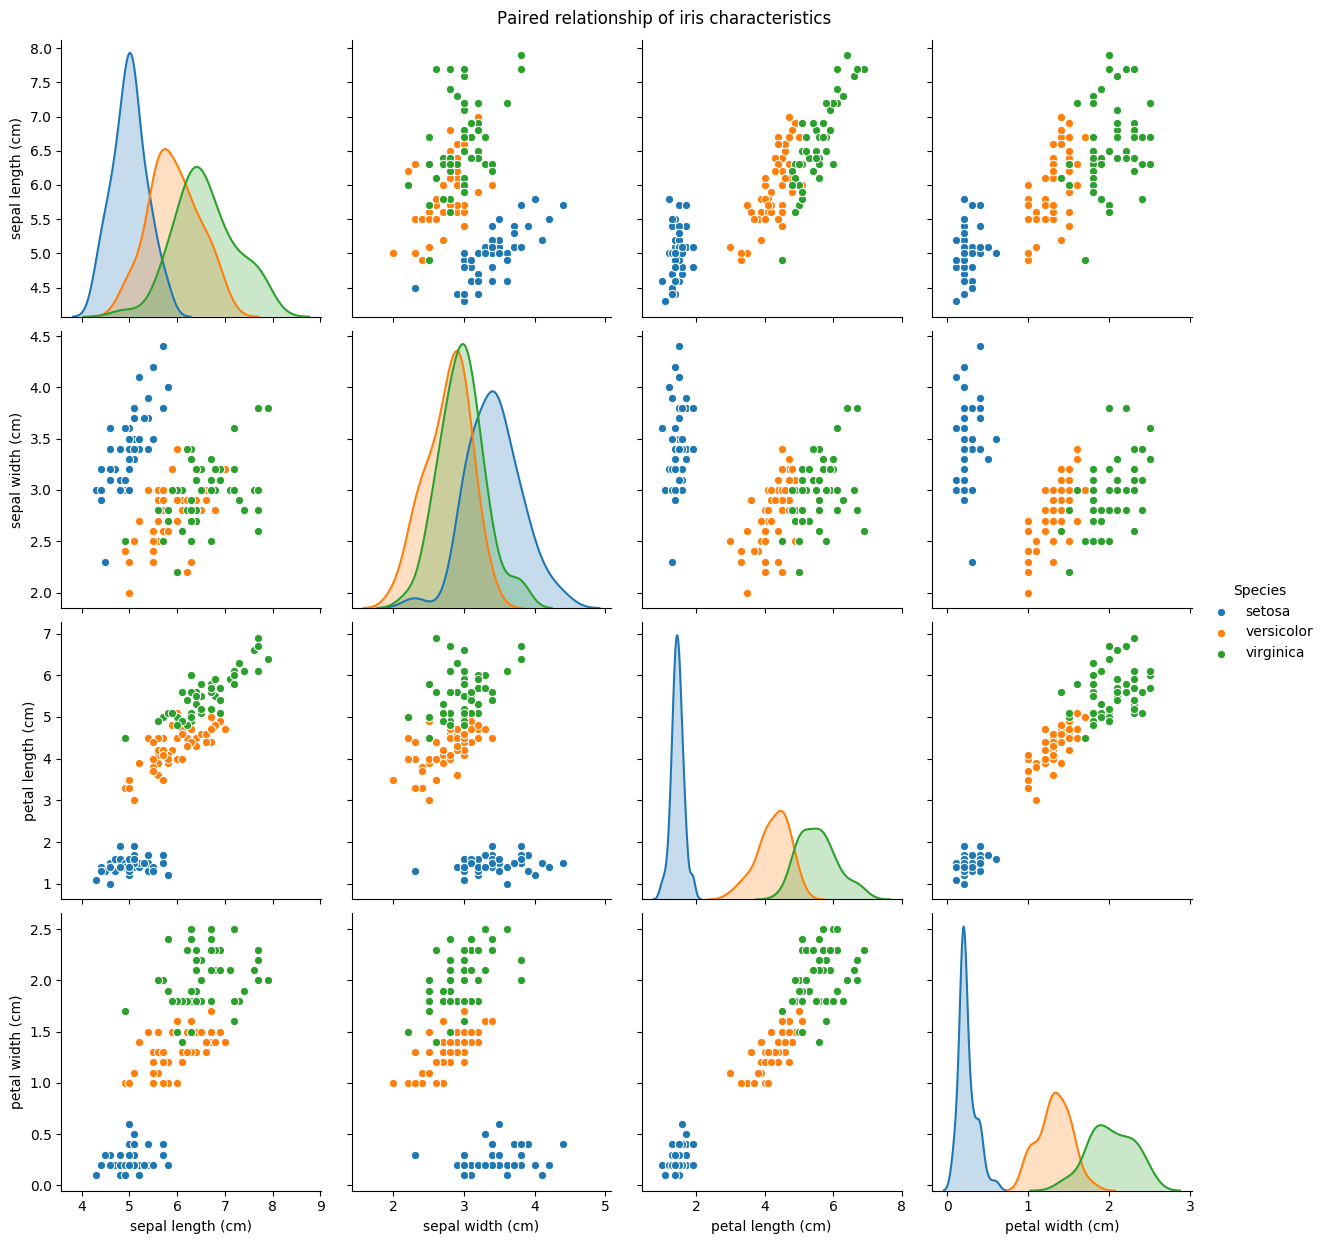

In [22]:
# 绘制 pairplot
sns.pairplot(iris, hue="Species", height=3)
plt.suptitle("Paired relationship of iris characteristics", y=1.02)
plt.show()

## 4.6 Seaborn 的 kdeplot花瓣长度的核密度估计

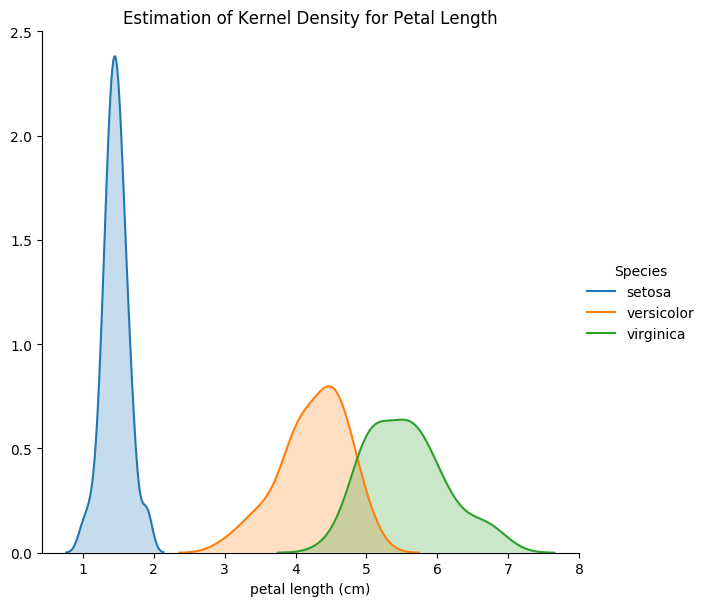

In [34]:
# 绘制 kdeplot
sns.FacetGrid(iris, hue="Species", height=6) \
   .map(sns.kdeplot, "petal length (cm)", shade=True) \
   .add_legend()
plt.title("Estimation of Kernel Density for Petal Length")      #花瓣长度的核密度估计
plt.show()

## 4.7 Andrews 曲线表示鸢尾花种类

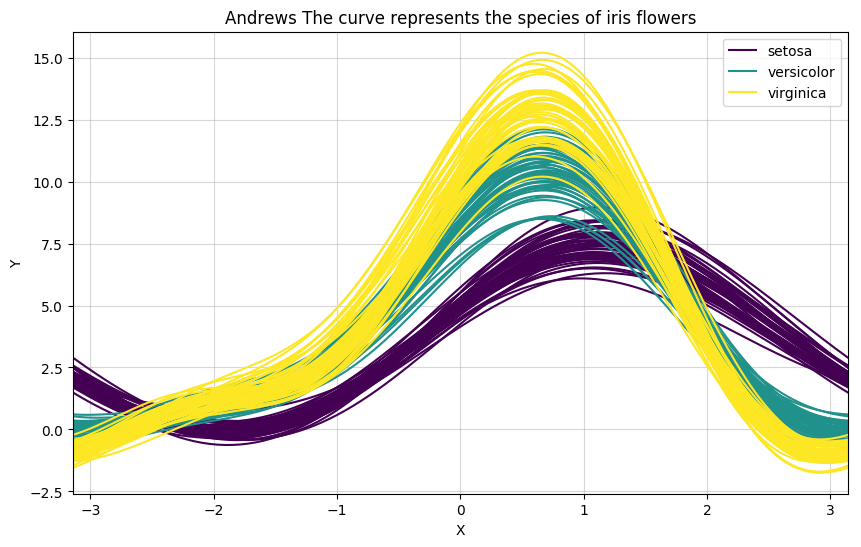

In [35]:
iris["Species"] = [iris_data.target_names[target] for target in iris_data.target]

# 绘制 Andrews 曲线
plt.figure(figsize=(10, 6))
andrews_curves(iris, "Species", colormap='viridis')
plt.title("Andrews The curve represents the species of iris flowers") # Andrews 曲线表示鸢尾花种类
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(alpha=0.5)
plt.show()
